# Chapter 6. Dimensionality Reduction: Squashing the Data Pancake with PCA

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

## Example 6-1. Principal component analysis of the scikit-learn digits dataset 

In [2]:
# 데이터 로드
digits_data = datasets.load_digits()
n = len(digits_data.images)

# 각 이미지는 8 * 8 배열로 표현된다.
# PCA에 대한 입력으로 사용하기 위해 이 배열을 평평하게 만든다.
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [3]:
# 각 이미지가 나타내는 숫자의 레이블 확인
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# PCA 변환기를 데이터셋에 피팅
# 주성분의 수는 전체 분산의 최소 80%를 설명하는 수준에서 자동으로 선택된다.
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [5]:
pca_transformer.explained_variance_ratio_[:3].sum()

0.4030395858767508

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


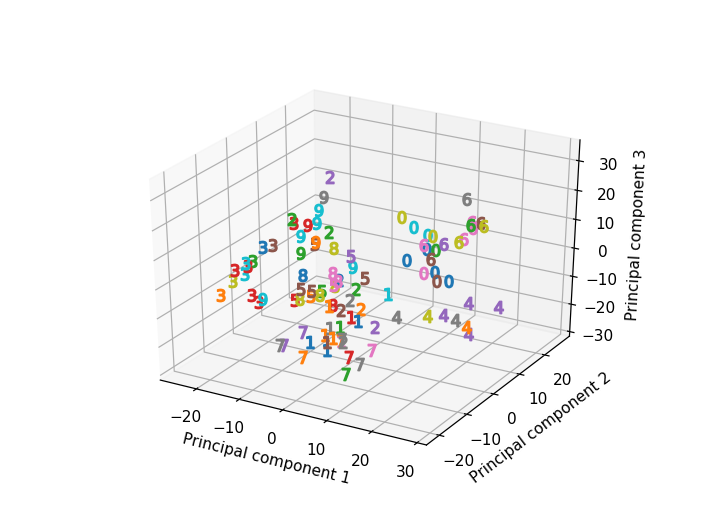

Text(0.5,0,'Principal component 3')

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')